In [28]:
#Part 2
from bs4 import BeautifulSoup

In [78]:
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt

In [96]:
#a)
#Extracting data from website
url = requests.get("https://top500.org/statistics/sublist/")
soup = BeautifulSoup(url.content, 'html.parser')
filename = "ws1.csv"
f= open(filename, "w")
headers = "Rank|System|Cores|Rmax (TFlop/s)|Rpeak (TFlop/s)|Power (kW)"
f.write(headers)

59

In [97]:
for record in soup.findAll('tr'):
    tbltxt = ""
    for data in record.findAll('td'):
        tbltxt = tbltxt + data.text + "|"
    tbltxt = tbltxt.replace('\n', '')
    tbltxt = re.sub(r' +', ' ', tbltxt)
    print(tbltxt[0:-1])
    f.write(tbltxt[0:-1]+'\n') #extracted data is written to file
f.close()


1|Summit - IBM Power System AC922, IBM POWER9 22C 3.07GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband , IBM DOE/SC/Oak Ridge National LaboratoryUnited States |2,414,592|148,600.0|200,794.9| 10,096
2|Sierra - IBM Power System S922LC, IBM POWER9 22C 3.1GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband , IBM / NVIDIA / Mellanox DOE/NNSA/LLNLUnited States |1,572,480|94,640.0|125,712.0| 7,438.3
3|Sunway TaihuLight - Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway , NRCPC National Supercomputing Center in WuxiChina |10,649,600|93,014.6|125,435.9| 15,371
4|Tianhe-2A - TH-IVB-FEP Cluster, Intel Xeon E5-2692v2 12C 2.2GHz, TH Express-2, Matrix-2000 , NUDT National Super Computer Center in GuangzhouChina |4,981,760|61,444.5|100,678.7| 18,482
5|Frontera - Dell C6420, Xeon Platinum 8280 28C 2.7GHz, Mellanox InfiniBand HDR , Dell EMC Texas Advanced Computing Center/Univ. of TexasUnited States |448,448|23,516.4|38,745.9|
6|Piz Daint - Cray XC50, Xeon E5-2690v3 12C 2.6GHz, Aries i

In [33]:
df = pd.read_csv("ws1.csv", sep = '|', encoding = 'unicode_escape')

In [34]:
df

,Rank,System,Cores,Rmax (TFlop/s),Rpeak (TFlop/s),Power (kW)
0,1,"Summit - IBM Power System AC922, IBM POWER9 22...","2,414,592","148,600.0","200,794.9","10,096"
1,2,"Sierra - IBM Power System S922LC, IBM POWER9 2...","1,572,480","94,640.0","125,712.0","7,438.3"
2,3,"Sunway TaihuLight - Sunway MPP, Sunway SW26010...","10,649,600","93,014.6","125,435.9","15,371"
3,4,"Tianhe-2A - TH-IVB-FEP Cluster, Intel Xeon E5-...","4,981,760","61,444.5","100,678.7","18,482"
4,5,"Frontera - Dell C6420, Xeon Platinum 8280 28C ...","448,448","23,516.4","38,745.9",NaN
5,6,"Piz Daint - Cray XC50, Xeon E5-2690v3 12C 2.6G...","387,872","21,230.0","27,154.3","2,384.2"
6,7,"Trinity - Cray XC40, Xeon E5-2698v3 16C 2.3GHz...","979,072","20,158.7","41,461.2","7,578.1"
7,8,AI Bridging Cloud Infrastructure (ABCI) - PRIM...,"391,680","19,880.0","32,576.6","1,649.3"
8,9,"SuperMUC-NG - ThinkSystem SD650, Xeon Platinum...","305,856","19,476.6","26,873.9",NaN
9,10,"Lassen - IBM Power System S922LC, IBM POWER9 2...","288,288","18,200.0","23,047.2",NaN


In [23]:
df.isnull().sum()

Rank                 0
System               0
Cores                0
Rmax (TFlop/s)       0
Rpeak (TFlop/s)      0
Power (kW)         291
dtype: int64

In [92]:
df.fillna(method ='ffill', inplace = True) #ffill method fills the data using previous value in the respective column

In [98]:
df.isnull().sum()

Rank               0
System             0
Cores              0
Rmax (TFlop/s)     0
Rpeak (TFlop/s)    0
Power (kW)         0
Power              0
dtype: int64

In [95]:
df.describe()

,Rank
count,500.000000
mean,250.500000
std,144.481833
min,1.000000
25%,125.750000
50%,250.500000
75%,375.250000
max,500.000000


In [94]:
#b)
#Summary statistcs for each data
df['Cores'].describe()

count        500
unique       286
top       57,600
freq          76
Name: Cores, dtype: object

In [46]:
df['Rmax (TFlop/s)'].describe()

count         500
unique        339
top       1,649.1
freq           72
Name: Rmax (TFlop/s), dtype: object

In [47]:
df['Rpeak (TFlop/s)'].describe()

count         500
unique        335
top       2,119.7
freq           72
Name: Rpeak (TFlop/s), dtype: object

In [48]:
df['Power (kW)'].describe()

count        209
unique       177
top        1,050
freq           3
Name: Power (kW), dtype: object

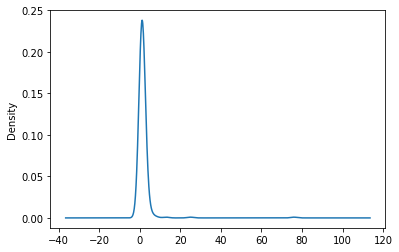

In [57]:
#Visualizations for each data
df['Cores'].value_counts().plot(kind='kde')

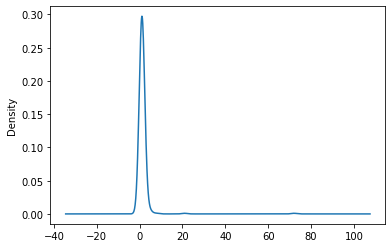

In [59]:
df['Rmax (TFlop/s)'].value_counts().plot(kind='kde')

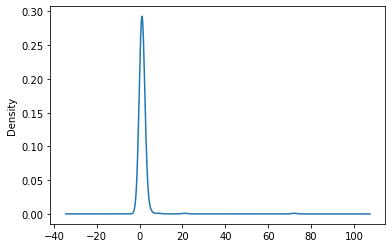

In [61]:
df['Rpeak (TFlop/s)'].value_counts().plot(kind='kde')

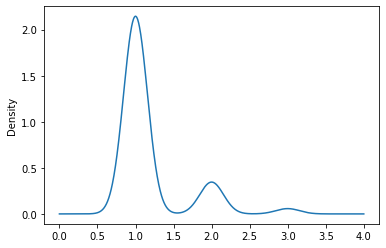

In [67]:
df['Power (kW)'].value_counts().plot(kind='kde')

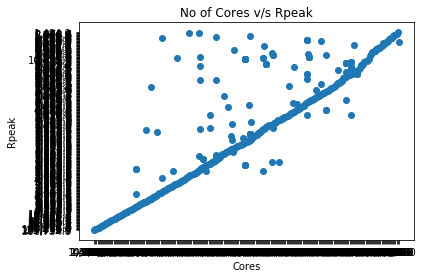

In [87]:
#c)
#Relationships
#Relationship between Cores and Rpeak
mplt.scatter(df['Cores'], df['Rpeak (TFlop/s)'])
mplt.xlabel('Cores')
mplt.ylabel('Rpeak')
mplt.title("No of Cores v/s Rpeak")
mplt.show()
#We can see in the graph that as number of cores increases, Rpeak also increses following linear regression.
#There are some points where Rpeak is less even with higher number of cores

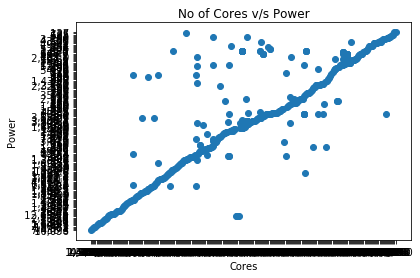

In [93]:
#Relationship between Cores and Power
mplt.scatter(df['Cores'], df['Power (kW)'])
mplt.xlabel('Cores')
mplt.ylabel('Power')
mplt.title("No of Cores v/s Power")
mplt.show()
#We can see in graph that as cores increses power consumption also increses showing linear regression
#At certain points power consumption is less with higer number of cores